In [9]:
# data_generator.py - Generate sample Smart Cookie data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import sqlite3
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Configuration
NUM_SCHOOLS = 3
NUM_TEACHERS_PER_SCHOOL = 15
NUM_STUDENTS_PER_SCHOOL = 200
NUM_TRANSACTIONS = 10000
START_DATE = datetime(2024, 1, 1)
END_DATE = datetime(2024, 11, 9)

# Sample data
SCHOOLS = [
    {'name': "St. Xavier's High School", 'city': 'Mumbai', 'state': 'Maharashtra'},
    {'name': 'DPS International', 'city': 'Delhi', 'state': 'Delhi'},
    {'name': 'Kendriya Vidyalaya', 'city': 'Bangalore', 'state': 'Karnataka'}
]

SUBJECTS = ['Mathematics', 'Science', 'English', 'Social Studies', 'Sports', 'Arts', 'Computer Science']

FIRST_NAMES = ['Aarav', 'Vivaan', 'Aditya', 'Arjun', 'Sai', 'Priya', 'Ananya', 'Ishaan',
               'Diya', 'Sara', 'Rohan', 'Krishna', 'Meera', 'Kavya', 'Aryan', 'Saanvi']

LAST_NAMES = ['Sharma', 'Patel', 'Kumar', 'Singh', 'Reddy', 'Nair', 'Gupta', 'Joshi',
              'Desai', 'Mehta', 'Iyer', 'Kapoor', 'Rao', 'Verma', 'Agarwal']

POINT_TYPES = {
    'GREEN': 'Reward Points',
    'BLUE': 'ThankQ Points',
    'PURPLE': 'Parent Points',
    'BROWN': 'Referral Points'
}

MERCHANT_CATEGORIES = ['Cafe', 'Book Shop', 'Sports Store', 'Movie Theater', 'Beauty Parlor']

def generate_schools():
    """Generate school data"""
    schools_df = pd.DataFrame(SCHOOLS)
    schools_df['school_id'] = range(1, len(schools_df) + 1)
    return schools_df

def generate_teachers(schools_df):
    """Generate teacher data"""
    teachers = []
    teacher_id = 1

    for _, school in schools_df.iterrows():
        for _ in range(NUM_TEACHERS_PER_SCHOOL):
            teachers.append({
                'teacher_id': teacher_id,
                'school_id': school['school_id'],
                'first_name': random.choice(FIRST_NAMES),
                'last_name': random.choice(LAST_NAMES),
                'subject': random.choice(SUBJECTS),
                'years_experience': random.randint(1, 25),
                'email': f'teacher{teacher_id}@school.com'
            })
            teacher_id += 1

    return pd.DataFrame(teachers)

def generate_students(schools_df):
    """Generate student data"""
    students = []
    student_id = 1

    for _, school in schools_df.iterrows():
        for _ in range(NUM_STUDENTS_PER_SCHOOL):
            grade = random.randint(6, 12)
            students.append({
                'student_id': student_id,
                'school_id': school['school_id'],
                'first_name': random.choice(FIRST_NAMES),
                'last_name': random.choice(LAST_NAMES),
                'grade': grade,
                'section': random.choice(['A', 'B', 'C']),
                'email': f'student{student_id}@school.com',
                'attendance_rate': round(random.uniform(70, 98), 2),
                'avg_marks': round(random.uniform(45, 95), 2)
            })
            student_id += 1

    return pd.DataFrame(students)

def generate_transactions(teachers_df, students_df):
    """Generate point transaction data"""
    transactions = []

    for i in range(NUM_TRANSACTIONS):
        transaction_type = random.choices(
            ['award', 'thankyou', 'parent_reward'],
            weights=[0.7, 0.2, 0.1]
        )[0]

        if transaction_type == 'award':
            # Teacher awards points to student
            teacher = teachers_df.sample(1).iloc[0]
            student = students_df[students_df['school_id'] == teacher['school_id']].sample(1).iloc[0]

            point_type = 'GREEN'
            amount = random.choice([10, 20, 30, 50, 100])
            reason = random.choice([
                'Excellent test score',
                'Outstanding assignment',
                'Class participation',
                'Perfect attendance',
                'Improved performance',
                'Sports achievement',
                'Art competition winner'
            ])
            from_user_id = teacher['teacher_id']
            to_user_id = student['student_id']
            from_type = 'teacher'
            to_type = 'student'

        elif transaction_type == 'thankyou':
            # Student thanks teacher
            student = students_df.sample(1).iloc[0]
            teacher = teachers_df[teachers_df['school_id'] == student['school_id']].sample(1).iloc[0]

            point_type = 'BLUE'
            amount = random.choice([5, 10, 15, 20])
            reason = random.choice([
                'Excellent teaching',
                'Extra help after class',
                'Inspiring mentorship',
                'Patient guidance',
                'Motivational support'
            ])
            from_user_id = student['student_id']
            to_user_id = teacher['teacher_id']
            from_type = 'student'
            to_type = 'teacher'

        else:  # parent_reward
            student = students_df.sample(1).iloc[0]
            point_type = 'PURPLE'
            amount = random.choice([20, 50, 100])
            reason = 'Parent appreciation'
            from_user_id = None
            to_user_id = student['student_id']
            from_type = 'parent'
            to_type = 'student'

        # Random timestamp
        days_diff = (END_DATE - START_DATE).days
        random_days = random.randint(0, days_diff)
        timestamp = START_DATE + timedelta(days=random_days)

        transactions.append({
            'transaction_id': i + 1,
            'from_user_id': from_user_id,
            'from_type': from_type,
            'to_user_id': to_user_id,
            'to_type': to_type,
            'point_type': point_type,
            'amount': amount,
            'reason': reason,
            'timestamp': timestamp
        })

    return pd.DataFrame(transactions)

def generate_redemptions(students_df, num_redemptions=500):
    """Generate coupon redemption data"""
    redemptions = []

    for i in range(num_redemptions):
        student = students_df.sample(1).iloc[0]
        category = random.choice(MERCHANT_CATEGORIES)

        redemptions.append({
            'redemption_id': i + 1,
            'student_id': student['student_id'],
            'merchant_category': category,
            'points_spent': random.choice([50, 100, 150, 200, 300]),
            'discount_value': random.randint(10, 50),
            'redeemed_at': START_DATE + timedelta(days=random.randint(0, (END_DATE - START_DATE).days))
        })

    return pd.DataFrame(redemptions)

def create_database():
    """Create SQLite database and populate with data"""
    print("Generating data...")

    # Generate all data
    schools_df = generate_schools()
    teachers_df = generate_teachers(schools_df)
    students_df = generate_students(schools_df)
    transactions_df = generate_transactions(teachers_df, students_df)
    redemptions_df = generate_redemptions(students_df)

    print(f"Generated:")
    print(f"  - {len(schools_df)} schools")
    print(f"  - {len(teachers_df)} teachers")
    print(f"  - {len(students_df)} students")
    print(f"  - {len(transactions_df)} transactions")
    print(f"  - {len(redemptions_df)} redemptions")

    # Save to CSV
    print("\nSaving CSV files...")
    schools_df.to_csv('data/raw/schools.csv', index=False)
    teachers_df.to_csv('data/raw/teachers.csv', index=False)
    students_df.to_csv('data/raw/students.csv', index=False)
    transactions_df.to_csv('data/raw/transactions.csv', index=False)
    redemptions_df.to_csv('data/raw/redemptions.csv', index=False)

    # Create SQLite database
    print("\nCreating SQLite database...")
    conn = sqlite3.connect('data/sample_data.db')

    schools_df.to_sql('schools', conn, if_exists='replace', index=False)
    teachers_df.to_sql('teachers', conn, if_exists='replace', index=False)
    students_df.to_sql('students', conn, if_exists='replace', index=False)
    transactions_df.to_sql('transactions', conn, if_exists='replace', index=False)
    redemptions_df.to_sql('redemptions', conn, if_exists='replace', index=False)

    conn.close()

    print("\n✅ Data generation complete!")
    print("Files created:")
    print("  - data/raw/*.csv")
    print("  - data/sample_data.db")

    return schools_df, teachers_df, students_df, transactions_df, redemptions_df

if __name__ == "__main__":
    # Create directories
    import os
    os.makedirs('data/raw', exist_ok=True)
    os.makedirs('data/processed', exist_ok=True)

    # Generate data
    create_database()

    print("\n📊 Sample Statistics:")
    conn = sqlite3.connect('data/sample_data.db')

    print("\nTotal points distributed by type:")
    query = """
    SELECT point_type,
           COUNT(*) as num_transactions,
           SUM(amount) as total_points,
           AVG(amount) as avg_points
    FROM transactions
    GROUP BY point_type
    """
    print(pd.read_sql_query(query, conn))

    print("\nTop 5 students by points earned:")
    query = """
    SELECT s.first_name || ' ' || s.last_name as student_name,
           s.grade,
           SUM(t.amount) as total_points
    FROM students s
    JOIN transactions t ON s.student_id = t.to_user_id AND t.to_type = 'student'
    GROUP BY s.student_id
    ORDER BY total_points DESC
    LIMIT 5
    """
    print(pd.read_sql_query(query, conn))

    conn.close()

Generating data...
Generated:
  - 3 schools
  - 45 teachers
  - 600 students
  - 10000 transactions
  - 500 redemptions

Saving CSV files...

Creating SQLite database...

✅ Data generation complete!
Files created:
  - data/raw/*.csv
  - data/sample_data.db

📊 Sample Statistics:

Total points distributed by type:
  point_type  num_transactions  total_points  avg_points
0       BLUE              1997         24595   12.315974
1      GREEN              6999        290830   41.553079
2     PURPLE              1004         57640   57.410359

Top 5 students by points earned:
   student_name  grade  total_points
0    Diya Gupta      6          1210
1   Diya Kapoor      7          1210
2  Ishaan Reddy      7          1190
3   Arjun Verma     12          1190
4   Kavya Verma     12          1180


       transaction_id  from_user_id    to_user_id        amount
count     10000.00000   8996.000000  10000.000000  10000.000000
mean       5000.50000     82.835594    245.286000     37.306500
std        2886.89568    139.462495    190.429875     31.588247
min           1.00000      1.000000      1.000000      5.000000
25%        2500.75000     15.000000     44.000000     15.000000
50%        5000.50000     29.000000    228.000000     20.000000
75%        7500.25000     43.000000    414.000000     50.000000
max       10000.00000    600.000000    600.000000    100.000000

Point type distribution:
point_type
GREEN     6999
BLUE      1997
PURPLE    1004
Name: count, dtype: int64


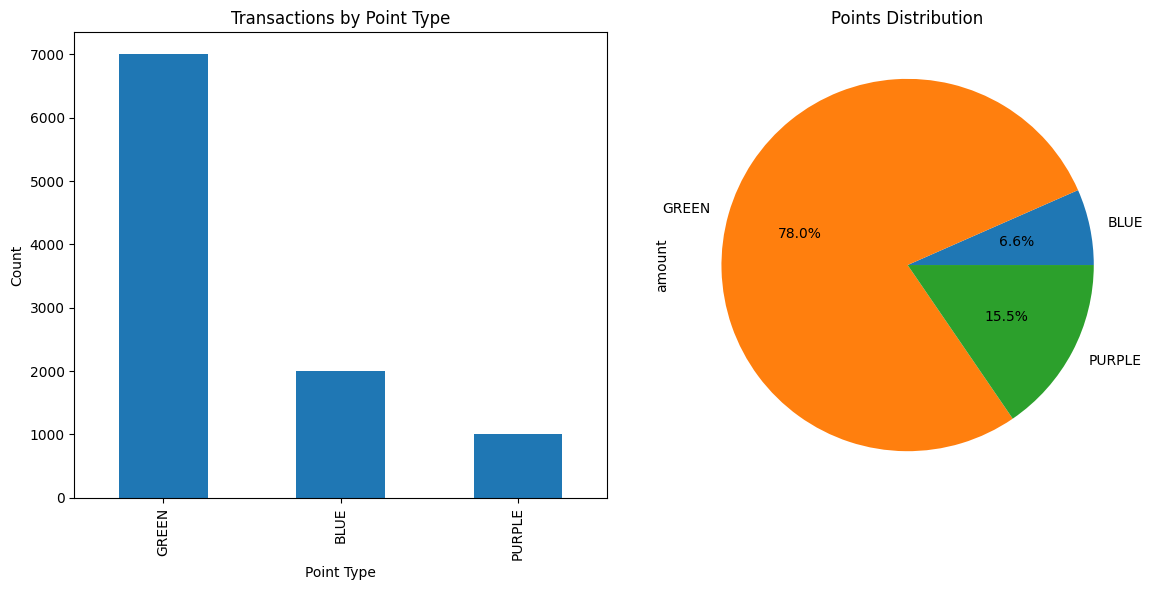

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
conn = sqlite3.connect('data/sample_data.db')
transactions = pd.read_sql_query("SELECT * FROM transactions", conn)
students = pd.read_sql_query("SELECT * FROM students", conn)

# Basic statistics
print(transactions.describe())
print("\nPoint type distribution:")
print(transactions['point_type'].value_counts())

# Visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transactions['point_type'].value_counts().plot(kind='bar')
plt.title('Transactions by Point Type')
plt.xlabel('Point Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
transactions.groupby('point_type')['amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Points Distribution')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data
student_points = transactions[transactions['to_type'] == 'student'].groupby('to_user_id')['amount'].sum().reset_index()
student_points.columns = ['student_id', 'total_points']

data = students.merge(student_points, on='student_id', how='left')
data['total_points'] = data['total_points'].fillna(0)

# Create target variable: High performer if avg_marks > 75
data['high_performer'] = (data['avg_marks'] > 75).astype(int)

# Features
features = ['total_points', 'attendance_rate', 'grade']
X = data[features]
y = data['high_performer']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        71
           1       0.42      0.37      0.39        49

    accuracy                           0.53       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.52      0.53      0.53       120


Feature Importance:
           feature  importance
1  attendance_rate    0.500668
0     total_points    0.403257
2            grade    0.096075


In [8]:
from scipy import stats
import numpy as np

# Correlation between points and academic performance
correlation = stats.pearsonr(data['total_points'], data['avg_marks'])
print(f"Correlation: {correlation[0]:.3f}, p-value: {correlation[1]:.3e}")

# T-test: Do students with high attendance perform better?
high_attendance = data[data['attendance_rate'] > 90]['avg_marks']
low_attendance = data[data['attendance_rate'] <= 90]['avg_marks']

t_stat, p_value = stats.ttest_ind(high_attendance, low_attendance)
print(f"\nT-test: t={t_stat:.3f}, p={p_value:.3e}")

# ANOVA: Performance across grades
grade_groups = [data[data['grade'] == g]['avg_marks'].values for g in range(6, 13)]
f_stat, p_value = stats.f_oneway(*grade_groups)
print(f"\nANOVA: F={f_stat:.3f}, p={p_value:.3e}")

Correlation: 0.028, p-value: 4.975e-01

T-test: t=-0.170, p=8.652e-01

ANOVA: F=1.569, p=1.537e-01
